In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import re

data = pd.read_csv('Rotten Tomatoes Movies.csv')
data.head(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8,148,37.0,411087.0
6,The 39 Steps,A man in London tries to help a counterespiona...,"Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,1935-06-06,87.0,Gaumont British Distributors,Certified Fresh,96,47,86.0,23827.0
7,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2002-04-02,92.0,Columbia Pictures,Fresh,96,27,78.0,9224.0
8,Charly (A Heartbeat Away),Sam Roberts thinks he has all the answers: the...,NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,2003-08-01,103.0,Excel Entertainment,Rotten,20,10,87.0,4819.0
9,Abraham Lincoln,"To date, this D.W. Griffith epic is the only t...",NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Benét","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,2008-11-18,97.0,United Artists,Fresh,90,10,38.0,455.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [3]:
data.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


In [4]:
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [5]:
"""
The dataset has several columns with missing values that could potentially be addressed to gain better insights.
"""
# Impute missing values for 'runtime_in_minutes' with the median
median_runtime = data['runtime_in_minutes'].median()
data['runtime_in_minutes'].fillna(median_runtime, inplace=True)

# For 'genre', 'directors', 'writers', 'cast', and 'studio_name', we can fill missing values with 'Unknown'
for column in ['genre', 'directors', 'writers', 'cast', 'studio_name']:
    data[column].fillna('Unknown', inplace=True)

# Since 'critics_consensus' has a large number of missing values and is text data, we might exclude it from numerical analysis
# However, for natural language processing tasks, we could consider different imputation strategies

# For 'audience_rating' and 'audience_count', we can consider filling missing values with the median
median_audience_rating = data['audience_rating'].median()
data['audience_rating'].fillna(median_audience_rating, inplace=True)
median_audience_count = data['audience_count'].median()
data['audience_count'].fillna(median_audience_count, inplace=True)

# dataset after imputation
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                    0
directors                0
writers                  0
cast                     0
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes       0
studio_name              0
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating          0
audience_count           0
dtype: int64

In [6]:
"""
Now, there are no missing values in the dataset that would impact numerical analysis, except for the movie_info and 
critics_consensus columns, which contain textual data and are not crucial for numerical analysis.
"""

'\nNow, there are no missing values in the dataset that would impact numerical analysis, except for the movie_info and \ncritics_consensus columns, which contain textual data and are not crucial for numerical analysis.\n'

In [7]:
"""
1. What % of films received a Certified Fresh Tomatometer rating? What about Rotten?
"""
data['tomatometer_status'].value_counts(normalize=True) * 100

#This indicates that nearly half of the films in the dataset have a Rotten rating, while a smaller portion is Certified Fresh.

Rotten             43.472773
Fresh              38.754658
Certified Fresh    17.772569
Name: tomatometer_status, dtype: float64

The newest films were released in 2019.0 - 12.0.


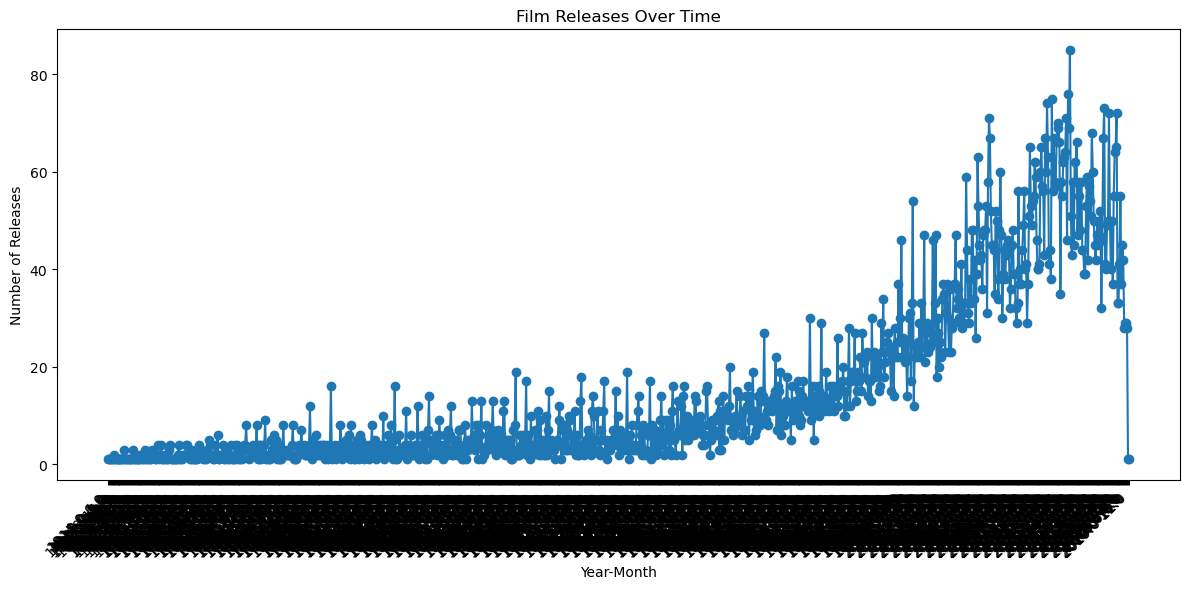

In [8]:
"""2. Explore new film releases over time. How has the volume of releases by month trended over time? What year/month were the newest films released?"""
# Convert 'in_theaters_date' to datetime format
data['in_theaters_date'] = pd.to_datetime(data['in_theaters_date'], errors='coerce')

# Extract month and year from the 'in_theaters_date' column
data['release_month'] = data['in_theaters_date'].dt.month
data['release_year'] = data['in_theaters_date'].dt.year

# Group by year and month to get the count of releases
release_counts = data.groupby(['release_year', 'release_month']).size().reset_index(name='count')

# Find the newest film releases
newest_films = data.loc[data['in_theaters_date'].idxmax()]
print(f"The newest films were released in {newest_films['release_year']} - {newest_films['release_month']}.")


# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(release_counts['release_year'].astype(str) + '-' + release_counts['release_month'].astype(str), release_counts['count'], marker='o')
plt.title('Film Releases Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
"""3. Compare average Tomatometer ratings by Studio. Which studios produce the highest-rated films, on average? The lowest?"""

# Calculate the average Tomatometer ratings by studio
df_grouped = data.groupby('studio_name')['tomatometer_rating'].mean().reset_index()

# Sort the studios by average rating
df_grouped_sorted = df_grouped.sort_values(by='tomatometer_rating', ascending=False)

# Get the studios with the highest and lowest average ratings
highest_rated_studio = df_grouped_sorted.iloc[0]
lowest_rated_studio = df_grouped_sorted.iloc[-1]

print('Studio with the highest average Tomatometer rating:')
print(highest_rated_studio)
print('\
Studio with the lowest average Tomatometer rating:')
print(lowest_rated_studio)


#The studio with the highest average Tomatometer rating is Famous Players, with an average rating of 100%.
#The studio with the lowest average Tomatometer rating is ITN Distribution / Hollywood Storm, with an average rating of 0%.

Studio with the highest average Tomatometer rating:
studio_name           The Brinkman Company
tomatometer_rating                   100.0
Name: 2465, dtype: object
Studio with the lowest average Tomatometer rating:
studio_name           Inferno Film Productions
tomatometer_rating                         0.0
Name: 1280, dtype: object


In [10]:
"""4. Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?"""

# Calculate the discrepancy between Tomatometer ratings and audience ratings
data['rating_discrepancy'] = abs(data['tomatometer_rating'] - data['audience_rating'])

# Sort the dataframe by the largest discrepancies
df_sorted_discrepancy = data.sort_values(by='rating_discrepancy', ascending=False)

# Get the top 5 films with the largest discrepancies
largest_discrepancies = df_sorted_discrepancy[['movie_title', 'tomatometer_rating', 'audience_rating', 'rating_discrepancy']].head(5)
largest_discrepancies


,movie_title,tomatometer_rating,audience_rating,rating_discrepancy
1990,96 Souls,0,95.0,95.0
8013,Is That a Gun in Your Pocket?,0,92.0,92.0
7135,Hating Breitbart,0,92.0,92.0
13665,The After Party,0,89.0,89.0
1738,Home,0,86.0,86.0


In [11]:
"""
The films with the largest discrepancies between Tomatometer ratings and audience ratings are:

"96 Souls" with a Tomatometer rating of 0 and an audience rating of 95, resulting in a discrepancy of 95.
"Is That a Gun in Your Pocket?" with a Tomatometer rating of 0 and an audience rating of 92, resulting in a discrepancy of 92.
"Hating Breitbart" with a Tomatometer rating of 0 and an audience rating of 92, resulting in a discrepancy of 92.
"The After Party" with a Tomatometer rating of 0 and an audience rating of 89, resulting in a discrepancy of 89.
"Outside the Law" with a Tomatometer rating of 86 and an audience rating of 0, resulting in a discrepancy of 86.

These films show significant differences in perception between critics and general audiences.
"""

'\nThe films with the largest discrepancies between Tomatometer ratings and audience ratings are:\n\n"96 Souls" with a Tomatometer rating of 0 and an audience rating of 95, resulting in a discrepancy of 95.\n"Is That a Gun in Your Pocket?" with a Tomatometer rating of 0 and an audience rating of 92, resulting in a discrepancy of 92.\n"Hating Breitbart" with a Tomatometer rating of 0 and an audience rating of 92, resulting in a discrepancy of 92.\n"The After Party" with a Tomatometer rating of 0 and an audience rating of 89, resulting in a discrepancy of 89.\n"Outside the Law" with a Tomatometer rating of 86 and an audience rating of 0, resulting in a discrepancy of 86.\n\nThese films show significant differences in perception between critics and general audiences.\n'

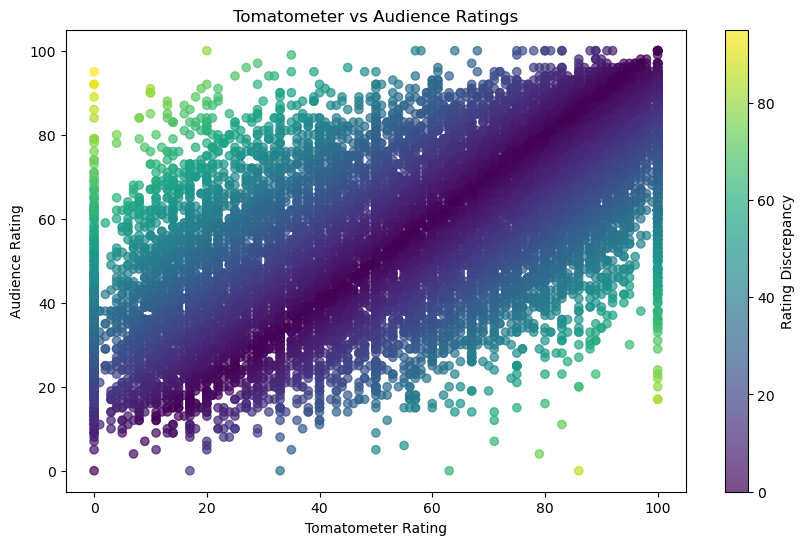

In [12]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['tomatometer_rating'], data['audience_rating'], c=data['rating_discrepancy'], cmap='viridis', alpha=0.7)

# Add labels and title
plt.title('Tomatometer vs Audience Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.colorbar(label='Rating Discrepancy')

# Display the plot
plt.show()

In [13]:
""" 5. Explore the critic's consensus rating: what language is used most often? """

# Combine all critics consensus into one large text
consensus_text = ' '.join(data['critics_consensus'].dropna())

# Use regular expression to remove non-alphabetic characters
consensus_text = re.sub('[^a-zA-Z\s]', '', consensus_text)

# Convert all text to lowercase
consensus_text = consensus_text.lower()

# Split the text into words
words = consensus_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
word_counts.most_common(10)

#These words are primarily common English articles, prepositions, and conjunctions, which are typical in descriptive
#and evaluative language.

[('the', 7834),
 ('and', 7246),
 ('a', 7054),
 ('of', 5199),
 ('to', 3588),
 ('is', 3090),
 ('its', 2917),
 ('but', 2129),
 ('with', 2041),
 ('in', 1903)]